In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras
import keras.backend as K

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
batch_size = 256
num_classes = 10
epochs = 10



In [9]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

img_rows = 28
img_cols = 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('data train shape: {0}, label train shape: {1}'.format(x_train.shape, y_train.shape))
print('data test shape: {0}, label test shape: {1}'.format(x_test.shape, y_test.shape))

data train shape: (60000, 28, 28, 1), label train shape: (60000,)
data test shape: (10000, 28, 28, 1), label test shape: (10000,)


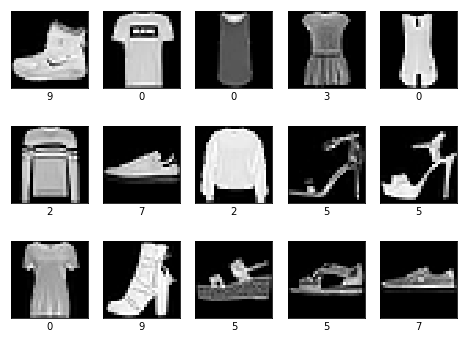

In [10]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_xlabel(y_train[i])
    ax.imshow(x_train[i,:,:,0], cmap='gray')

    

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


In [12]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
__________

In [15]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

W0703 20:45:38.640448 139851472496512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0703 20:45:38.650894 139851472496512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [16]:

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

score = model.evaluate(x_test, y_test, verbose=0)
print('\n\nTest loss:', score[0])
print('Test accuracy:', score[1])

W0703 20:45:48.275332 139851472496512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 196s 3ms/step - loss: 1.5278 - acc: 0.4206 - val_loss: 0.7580 - val_acc: 0.7150
Epoch 2/10
60000/60000 [==============================] - 194s 3ms/step - loss: 0.7437 - acc: 0.7160 - val_loss: 0.6208 - val_acc: 0.7615
Epoch 3/10
60000/60000 [==============================] - 192s 3ms/step - loss: 0.6359 - acc: 0.7568 - val_loss: 0.5526 - val_acc: 0.7911
Epoch 4/10
60000/60000 [==============================] - 194s 3ms/step - loss: 0.5798 - acc: 0.7802 - val_loss: 0.5218 - val_acc: 0.8081
Epoch 5/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.5487 - acc: 0.7922 - val_loss: 0.4849 - val_acc: 0.8251
Epoch 6/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.5175 - acc: 0.8045 - val_loss: 0.4561 - val_acc: 0.8299
Epoch 7/10
60000/60000 [==============================] - 192s 3ms/step - loss: 0.4979 - acc: 0.8125 - val_loss: 0.4535 - 

In [0]:
def plot_history(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

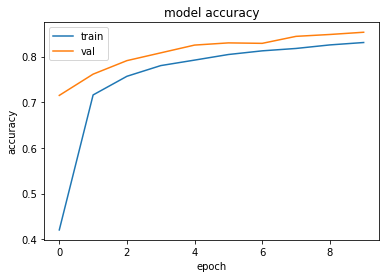

In [18]:
plot_history(history)

[2]


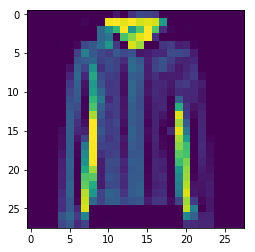

In [24]:
plt.imshow(x_test[6,:,:,0])
pred_class = model.predict_classes(x_test[1].reshape(-1, 28, 28, 1))
print(pred_class)

In [23]:
model.save('my_model.h5')
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ancle boot"}

saved_model = keras.models.load_model('my_model.h5')
pred_class = saved_model.predict_classes(x_test[6].reshape(-1, 28, 28, 1))
print(pred_class)

print(labels[int(pred_class)])

[4]
Coat
